# PlasticsSales Data Forecasting using ARIMA Model

In [3]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6  

In [4]:
d1 = pd.read_csv("D:/ExcelR/Assignments/Forecasting/PlasticSales.csv")
print(d1.shape)
d1

(60, 2)


,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [5]:
d1['Month'] = pd.to_datetime(d1['Month'],infer_datetime_format=True) 
indexedDataset = d1.set_index(['Month'])
indexedDataset

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


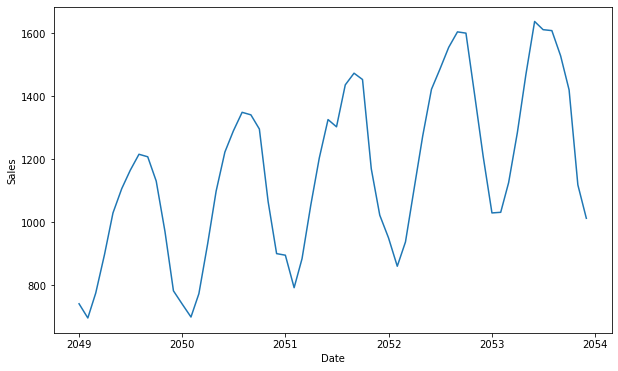

In [6]:
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexedDataset)

In [7]:
def ts(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

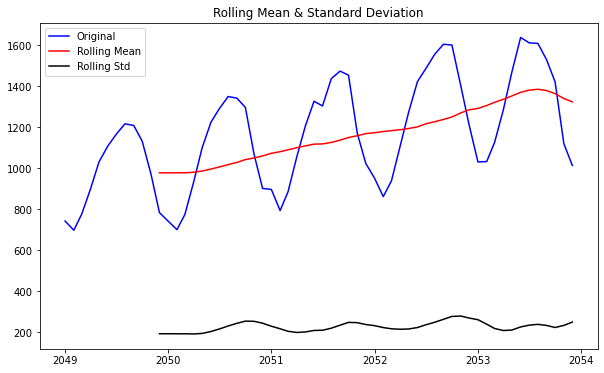

Results of Dickey Fuller Test:
Test Statistic                 -0.742564
p-value                         0.835414
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [8]:
ts(indexedDataset)

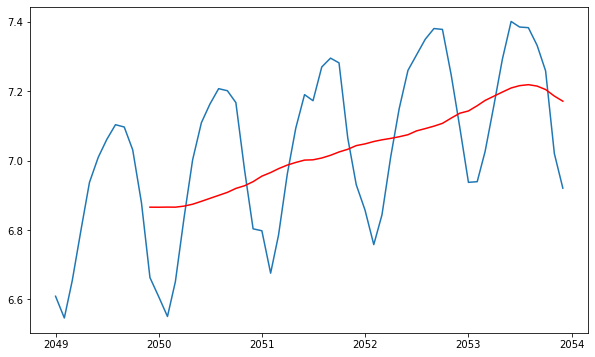

In [9]:
indexedDataset_logScale = np.log(indexedDataset)
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Sales
Month,
2049-12-01,-0.202702
2050-01-01,-0.257722
2050-02-01,-0.315000
2050-03-01,-0.214293
2050-04-01,-0.031629
2050-05-01,0.127790
2050-06-01,0.226392
2050-07-01,0.271234
2050-08-01,0.307306


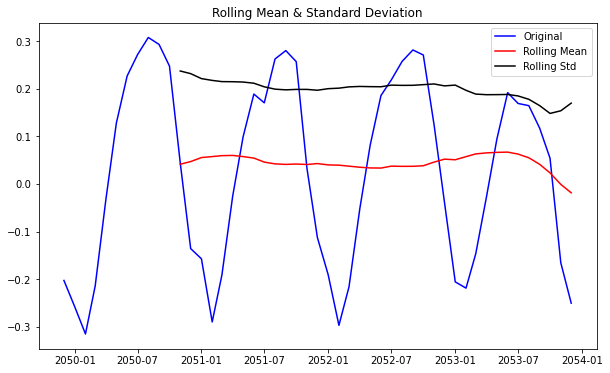

Results of Dickey Fuller Test:
Test Statistic                 -5.528529
p-value                         0.000002
#Lags Used                      5.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [11]:
ts(datasetLogScaleMinusMovingAverage)

# Exponential decay

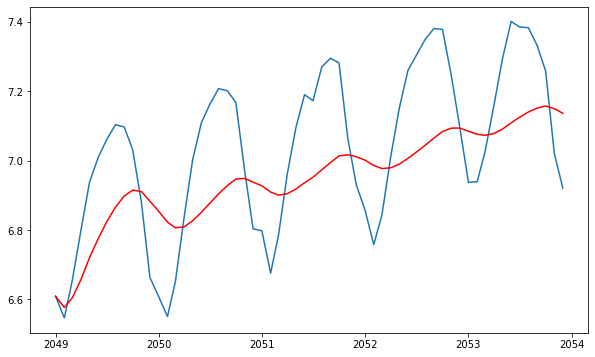

In [12]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

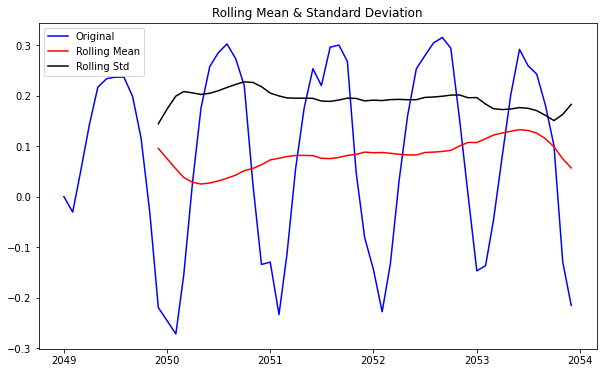

Results of Dickey Fuller Test:
Test Statistic                 -5.587402
p-value                         0.000001
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [13]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
ts(datasetLogScaleMinusExponentialMovingAverage)

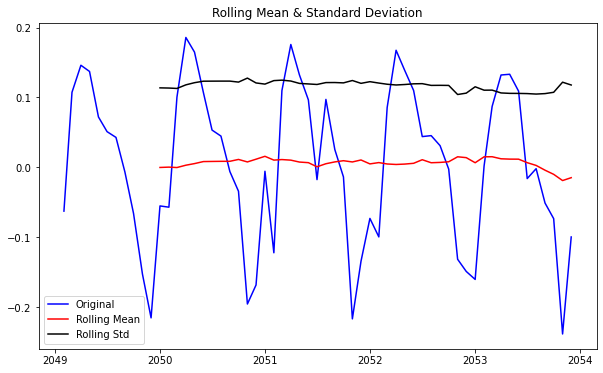

Results of Dickey Fuller Test:
Test Statistic                 -0.809664
p-value                         0.816267
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [14]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)
ts(datasetLogDiffShifting)

<ipython-input-15-cb7f808c9f8a>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-15-cb7f808c9f8a>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


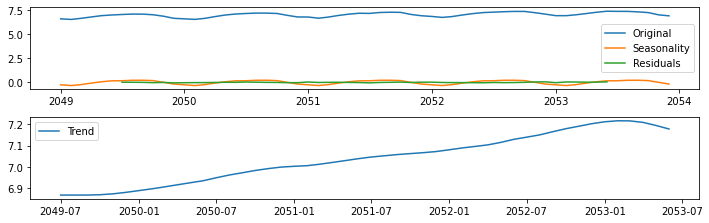

In [15]:
decomposition = seasonal_decompose(indexedDataset_logScale.Sales) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.


In [16]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
Sales=pd.DataFrame(decomposedLogData)
Sales['Sales']= Sales['resid']
Sales = Sales.drop(['resid'],axis=1)
Sales


,Sales
Month,
2049-07-01,0.022795
2049-08-01,0.015486
2049-09-01,0.005800
2049-10-01,-0.024853
2049-11-01,-0.000231
2049-12-01,-0.047902
2050-01-01,-0.030503
2050-02-01,-0.020579
2050-03-01,-0.019177


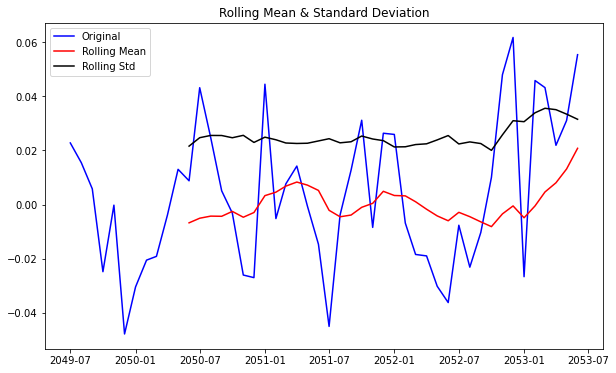

Results of Dickey Fuller Test:
Test Statistic                 -4.138163
p-value                         0.000837
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [17]:
decomposedLogData = Sales
ts(decomposedLogData)

C:\Users\Mr.Cool\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


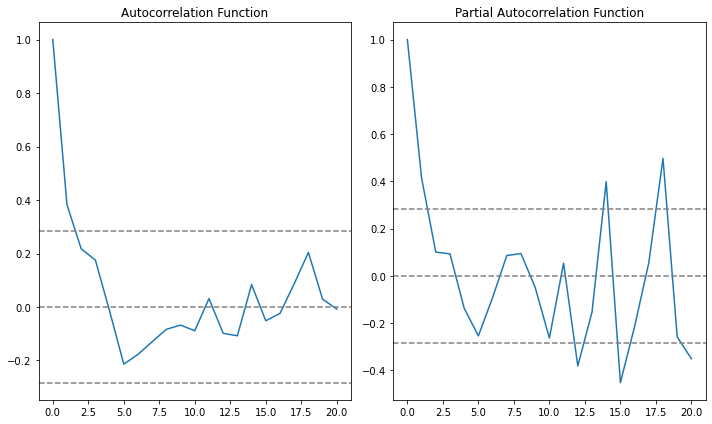

In [18]:
#ACF & PACF plots

lag_acf = acf(decomposedLogData, nlags=20)
lag_pacf = pacf(decomposedLogData, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(decomposedLogData)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(decomposedLogData)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(decomposedLogData)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(decomposedLogData)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() 

C:\Users\Mr.Cool\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mr.Cool\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


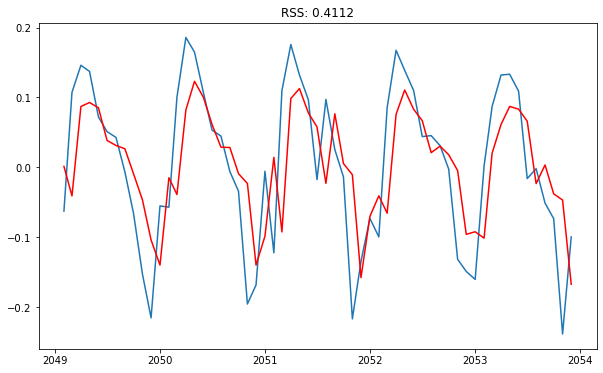

In [19]:
#AR Model
#making order=(1,1,1) gives RSS=1.5023
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Sales'])**2))
print('Plotting AR model')

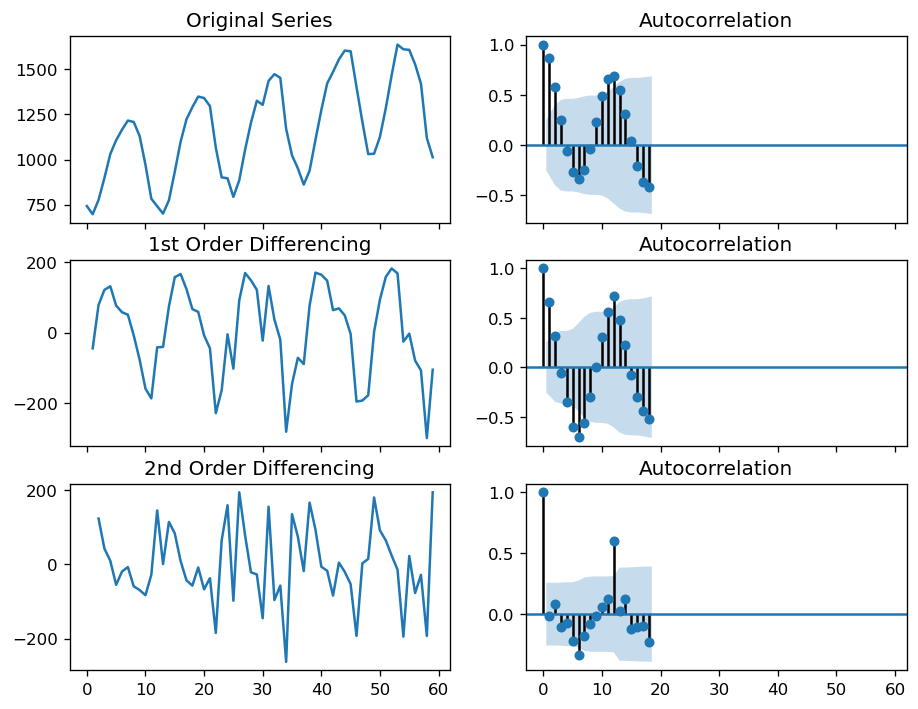

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(d1.Sales); axes[0, 0].set_title('Original Series')
plot_acf(d1.Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(d1.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(d1.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(d1.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(d1.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

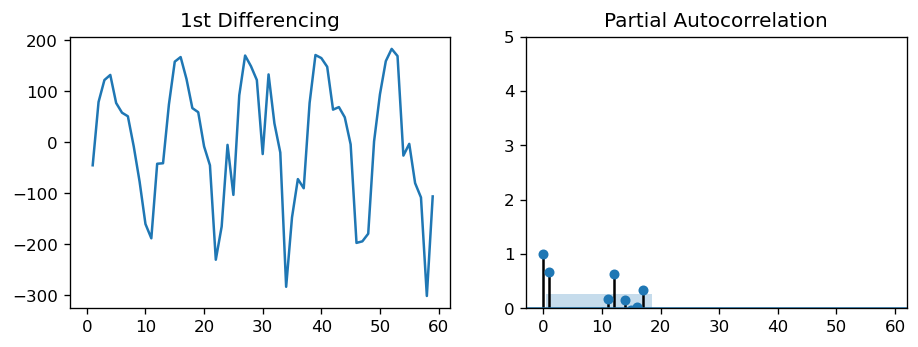

In [21]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(d1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(d1.Sales.diff().dropna(), ax=axes[1])

plt.show()


In [22]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(d1.Sales, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -351.009
Method:                       css-mle   S.D. of innovations             92.316
Date:                Sun, 31 Jan 2021   AIC                            710.018
Time:                        23:41:20   BIC                            718.328
Sample:                             1   HQIC                           713.262
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1608     32.139      0.036      0.971     -61.831      64.153
ar.L1.D.Sales     0.5750      0.138      4.159      0.000       0.304       0.846
ma.L1.D.Sales     0.1630      0.148     

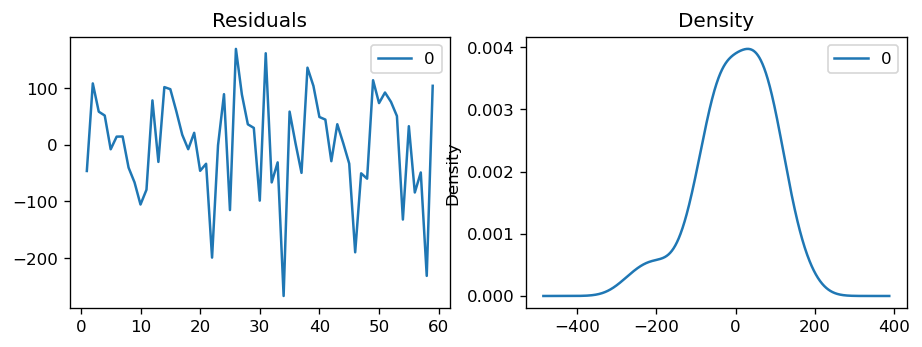

In [23]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

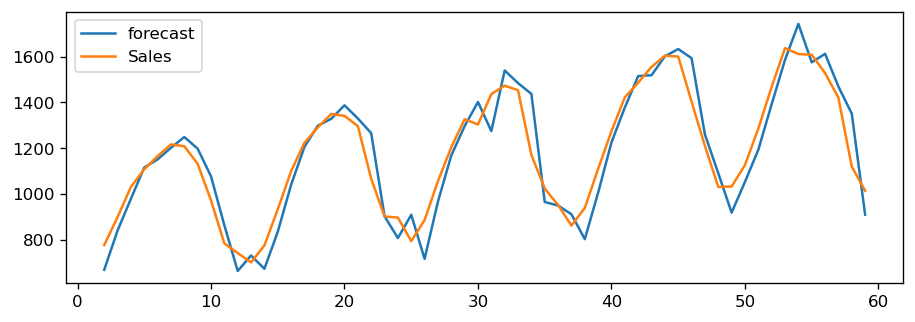

In [24]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [25]:
d1.shape

(60, 2)

In [26]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = d1.Sales[0:50]
test = d1.Sales[50:]


In [27]:
 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(60, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [ ]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)